# Loan Application Status Prediction

Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 



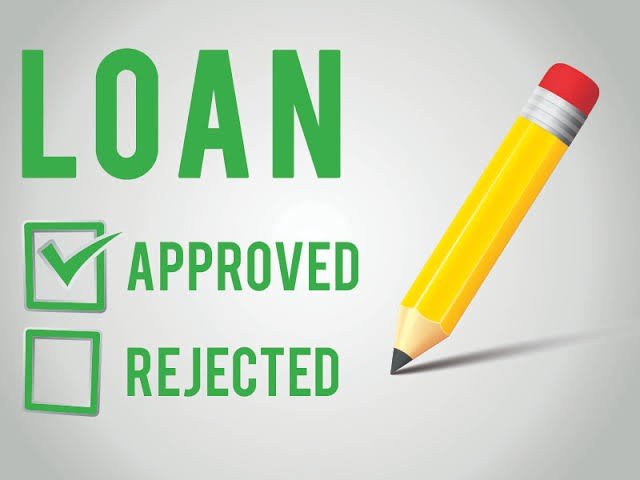

In [2]:
# To start, we will import some libraries that will allow us to explore the dataset and its features.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'E:\Data Science Certificates\Evaluation project\Loan Application Status Prediction\Loan Application Status Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Looking at first view of data, I see that there is Loan_ID Colum which will never help us to predict anything as it is always unique for every applicationso we can drop this 

In [4]:
# Droping

df.drop('Loan_ID',axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Ok now lets look further data
df.shape

(614, 12)

We have 614 rows and 12 columns in dataset

In [6]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
df.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
92,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y
242,Male,No,0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
520,Male,Yes,2,Not Graduate,No,2192,1742.0,45.0,360.0,1.0,Semiurban,Y
229,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y


In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see that we have null value present in dataset which we need to fill out using imputing techniques as per best fitted method

In [9]:
# Lest see how much data is missing in percentage
Missing_percentage = df.isnull().sum().sort_values(ascending=False)/len(df)
Missing_percentage[:12]


Credit_History       0.081433
Self_Employed        0.052117
LoanAmount           0.035831
Dependents           0.024430
Loan_Amount_Term     0.022801
Gender               0.021173
Married              0.004886
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

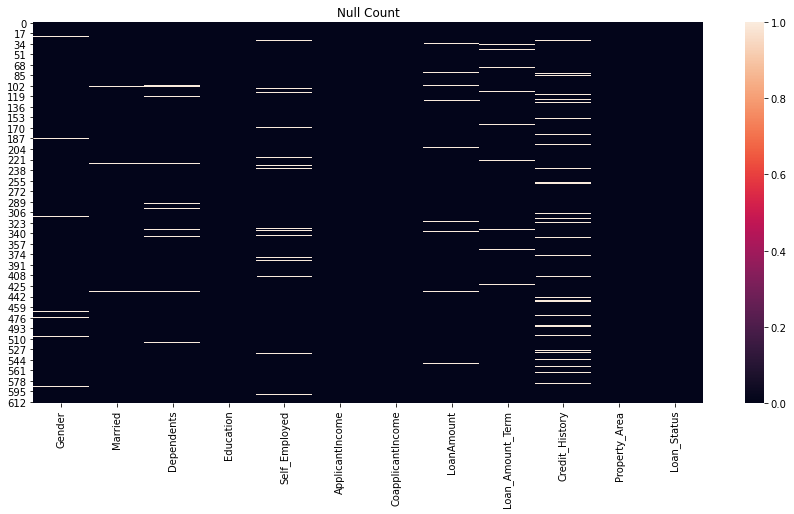

In [10]:
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull())
plt.title("Null Count")
plt.show


We can see null values on above graph and observed that Credit_history has highest missing data and this column is very important for us because even in real work credit score plays vital roles in decison of loan approval

In [11]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have Objects data available which we need to covert by Encoding techniques

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Above details shows us multiple details like how many columns are there, How much data is missing, How much memory our Dataset is consuming  and Datatype

In [13]:
count = df.nunique()
count


Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

We can see uniqueness of Dataset from above vlaues where Application income has 505 unique incomes like that we can observ all columns

In [14]:
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        print(x)
        print(df[x].value_counts())
        print('*'*30)


Gender
Male      489
Female    112
Name: Gender, dtype: int64
******************************
Married
Yes    398
No     213
Name: Married, dtype: int64
******************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
******************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
******************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
******************************
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
******************************
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
******************************


We can see numbers uniqueness along with name of object for better understanding

<AxesSubplot:>

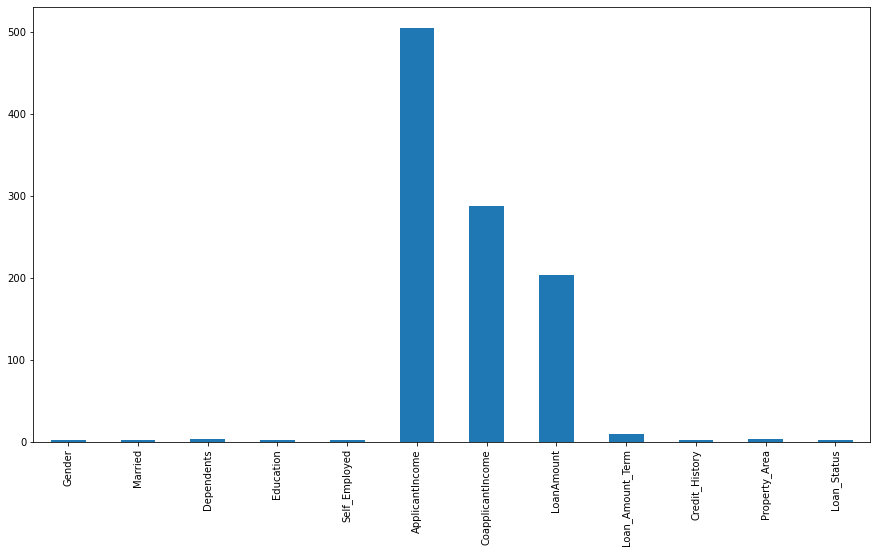

In [15]:
count = df.nunique()

plt.figure(figsize=(15,8))
count.plot(kind='bar')


We have already observed these numbers

In [16]:
df.loc[df['Gender']==" "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There is no spaces available in dataset 

<AxesSubplot:xlabel='Gender', ylabel='count'>

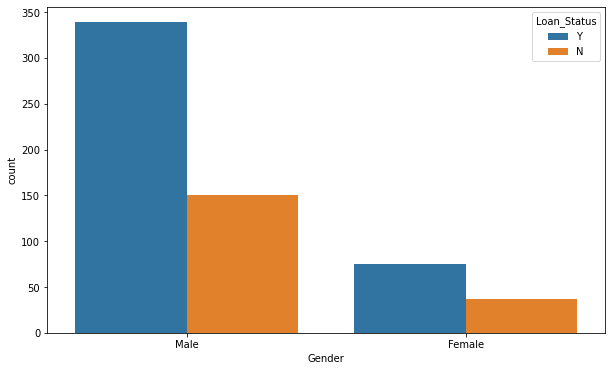

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df,hue='Loan_Status')

So we can see above males are high in application and approved count is also high in Males catagory

<AxesSubplot:xlabel='Married', ylabel='count'>

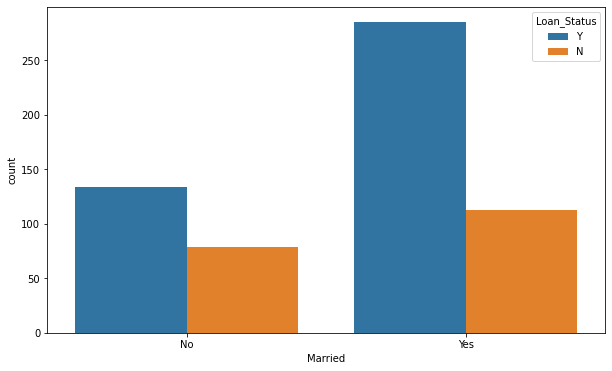

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Married',data=df,hue='Loan_Status')

Married borrowers are high as compare to unmarried ones. They are the ones who got highest approval as well

<AxesSubplot:xlabel='Education', ylabel='count'>

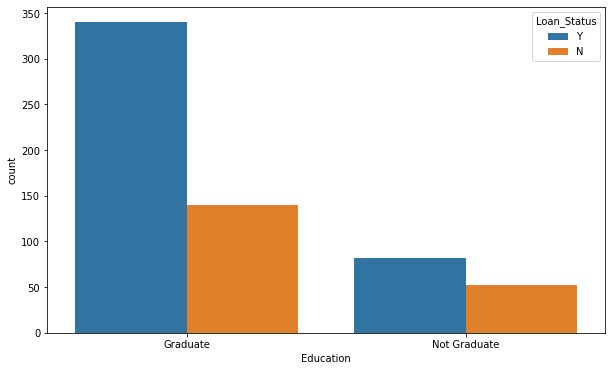

In [19]:
plt.figure(figsize=(10,6))
sns.countplot('Education',data=df,hue='Loan_Status')


As we can observe one thing here Loan approved percentage looks high when we look at Graduate person and Not graduates approvals are low

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

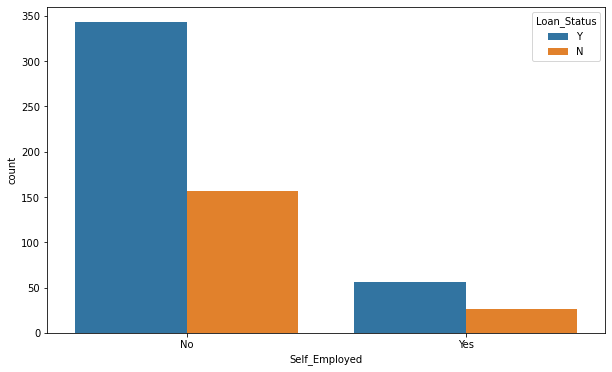

In [20]:
plt.figure(figsize=(10,6))
sns.countplot('Self_Employed',data=df,hue='Loan_Status')

Count looks high for those who are not self Employed

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

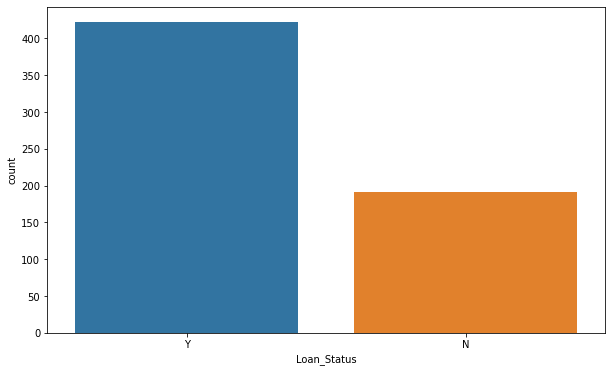

In [21]:

plt.figure(figsize=(10,6))
sns.countplot('Loan_Status',data=df)

We can see from above graph that Loan status data is imbalance meand target is imbalanced so we need to balance data before we traine model

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

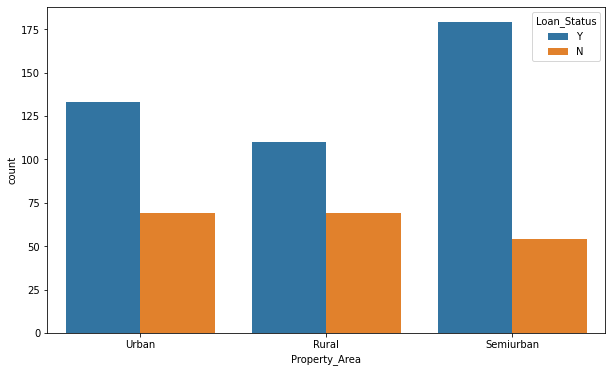

In [22]:

plt.figure(figsize=(10,6))
sns.countplot('Property_Area',data=df,hue='Loan_Status')

So Highest loan aaprovals are from semiurban area and lowest looks from Rural

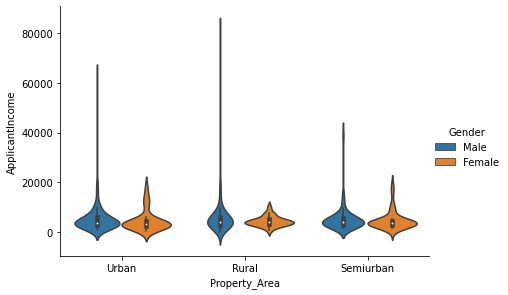

In [23]:
sns.catplot(x='Property_Area',
            y='ApplicantIncome',
            hue='Gender',
            data=df,
            height=4,aspect=1.5,
            kind='violin')

We cans see that highest income we found in Rural area followed by Urban and Semiurban

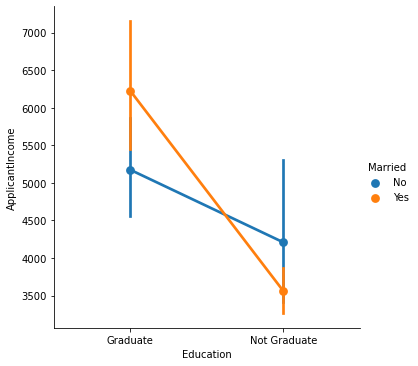

In [24]:
sns.catplot(x="Education",
            y="ApplicantIncome",
            hue="Married",
            kind="point", 
            data=df)

Those who are married and graduate they have high income but who are not not Graduate they are having lowest income in data set
Thsoe are are unmarried and graduate they are earnig good but less than those who are married graduate

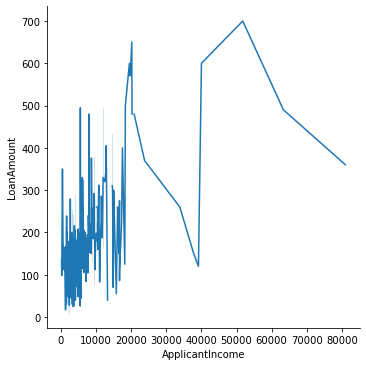

In [25]:
sns.relplot(x='ApplicantIncome', y="LoanAmount", kind="line", data=df)
plt.show()

So trend is showing that when there is high income chances of getting high laon approved will increase 

We have visulized data very well and tried to find out hedden patter behind data so now we can trate missing data to fill out them in right way

In [26]:
# Handling Null values

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

We have filled out missing data now

In [27]:
# Let check
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no null values present in datasetn now

In [28]:
# Handling Objest using LabelEncoder

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

list=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

for i in list:
    df[i]=le.fit_transform(df[i].astype(str))

In [29]:
# Lest see Type of data after encoding done

df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

So there is no Object present now

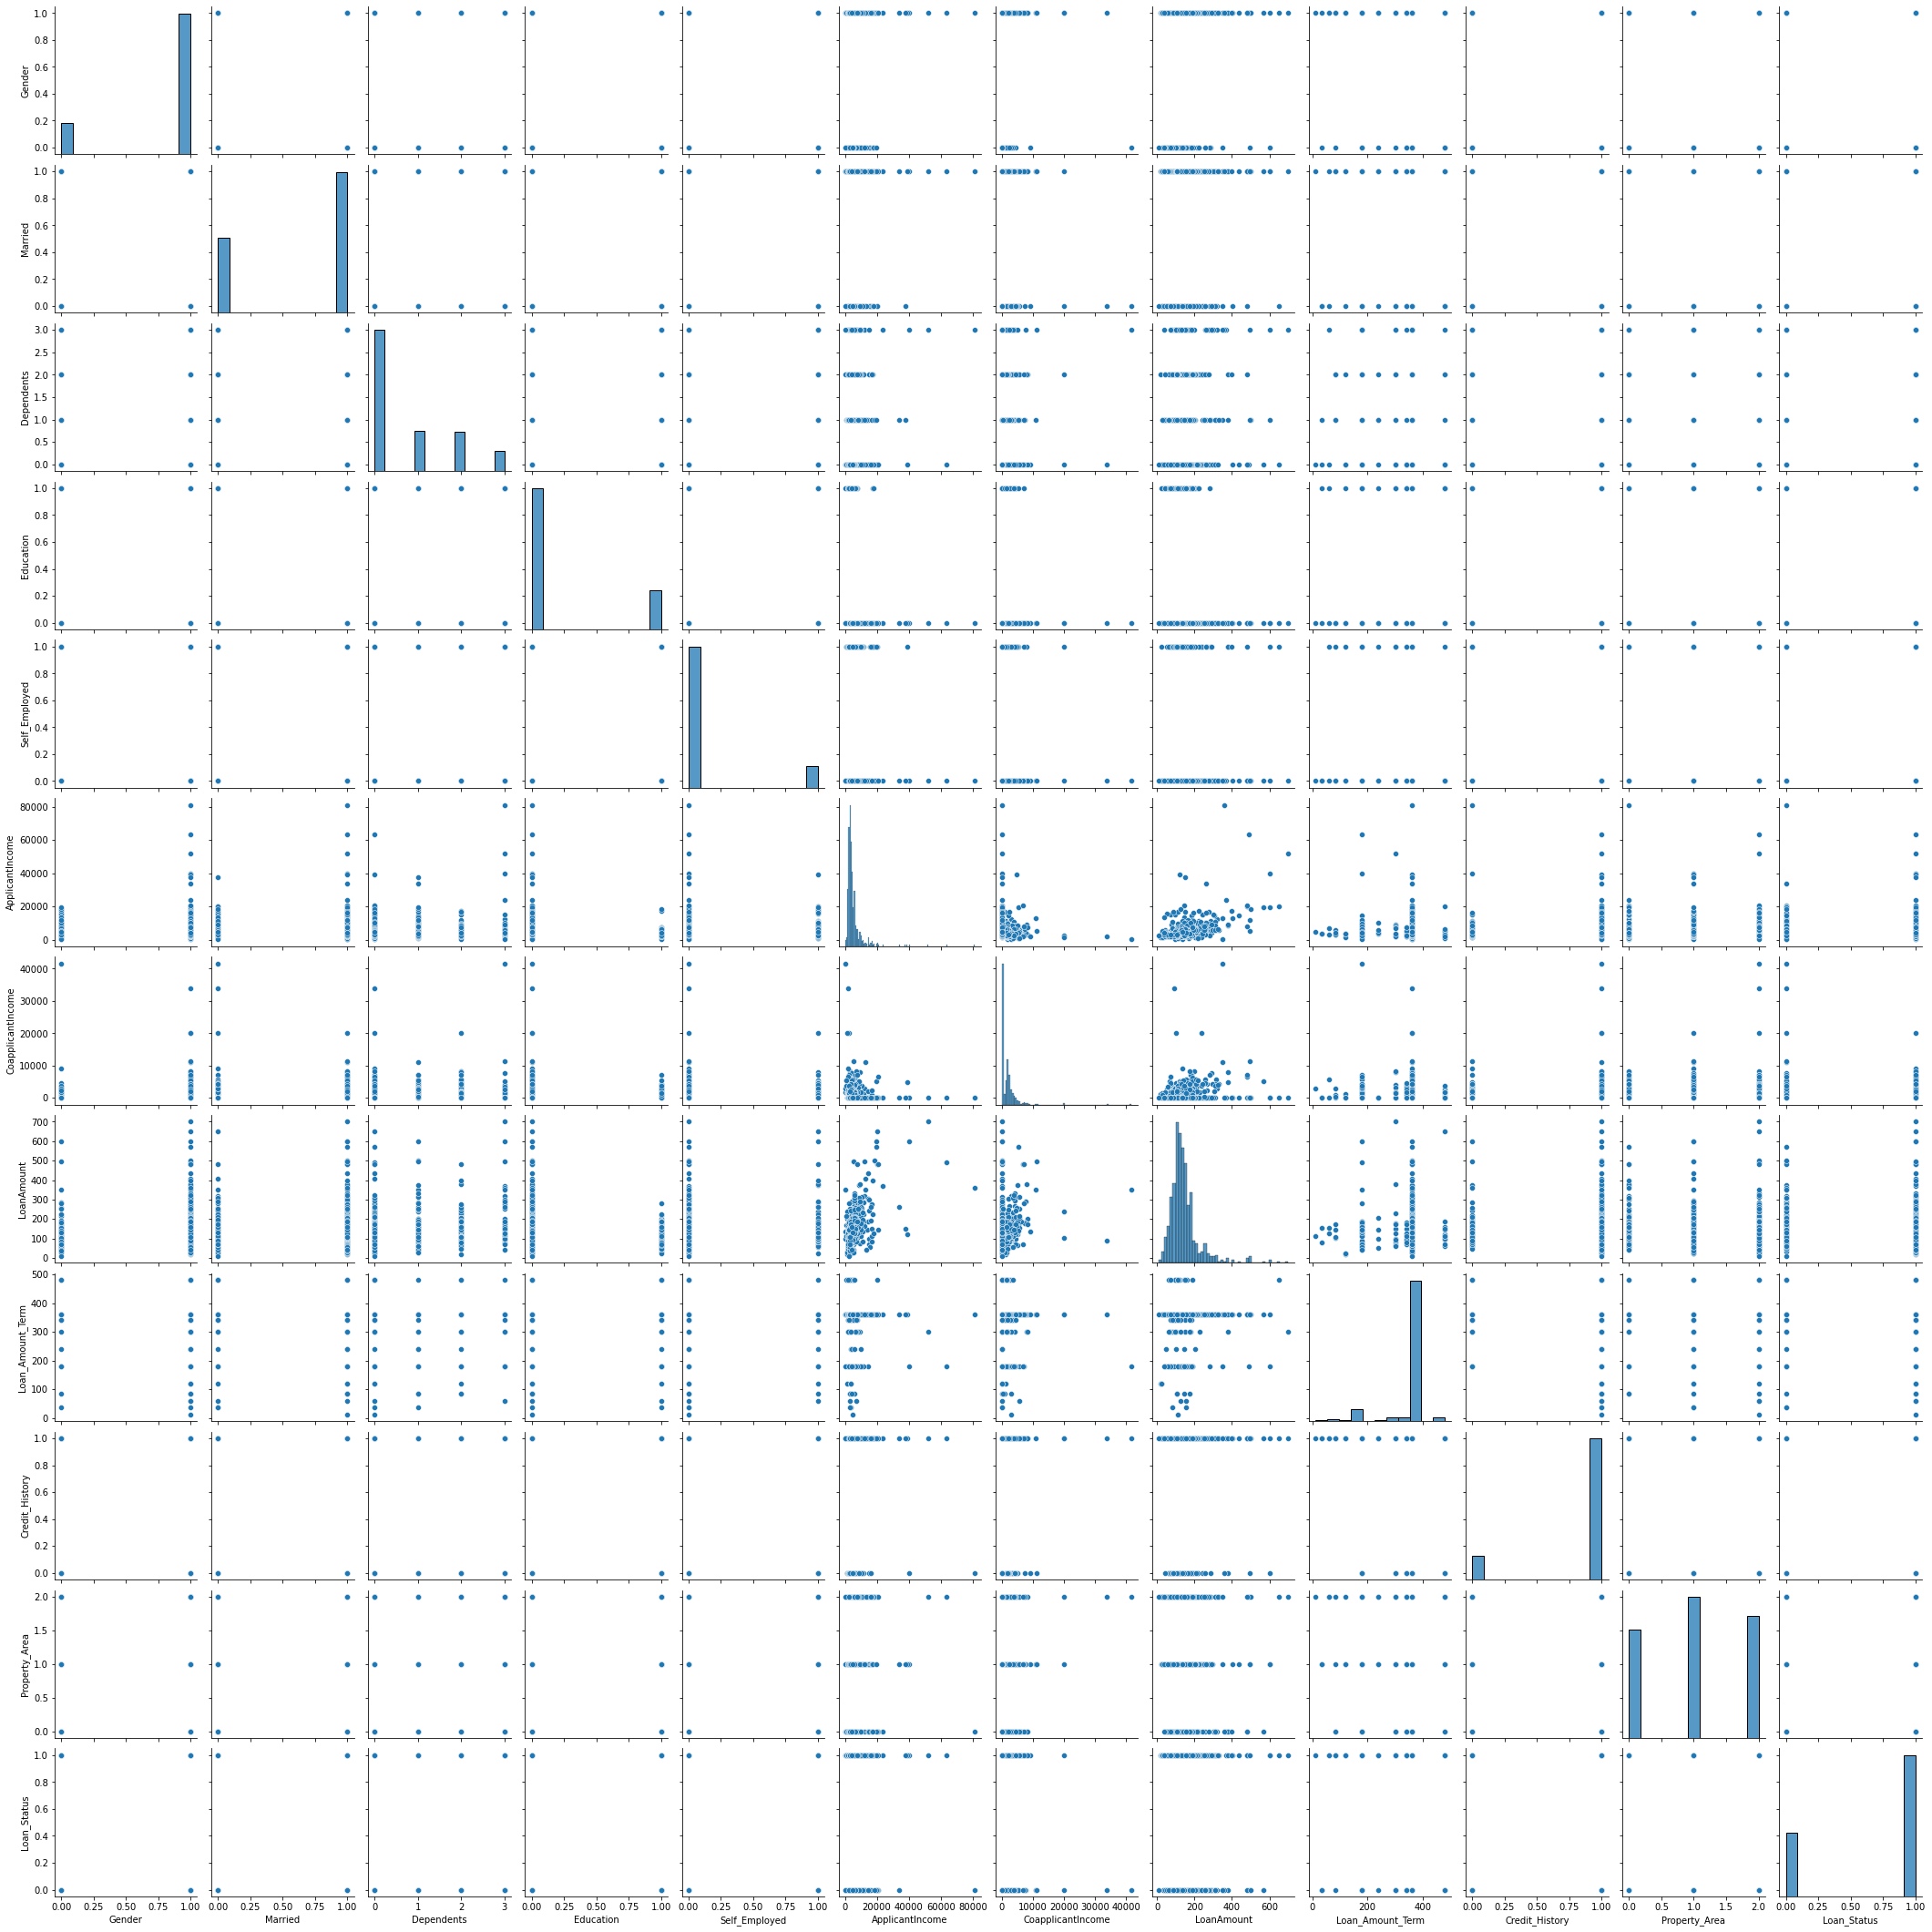

In [30]:
sns.pairplot(df)

As we already know we have lot of catagorical columns hence there is not much realtion we found in pair plot. but again I see that Loan amount has direct postive relation with Applicant income and coaaplicant income. When income raise loan value is also raise

# Descriptive statistics

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.817590,0.386497,0.0,1.00,1.0,1.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.218241,0.413389,0.0,0.00,0.0,0.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


We can see from above stats that there are chances of outliers in Application income and coaaplication income which we need to handle and process. Standered deviation is also high for both income columns

In [32]:
# Checking correlation for all colouns

df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


Highest corrlated columns are Income columns here

<AxesSubplot:>

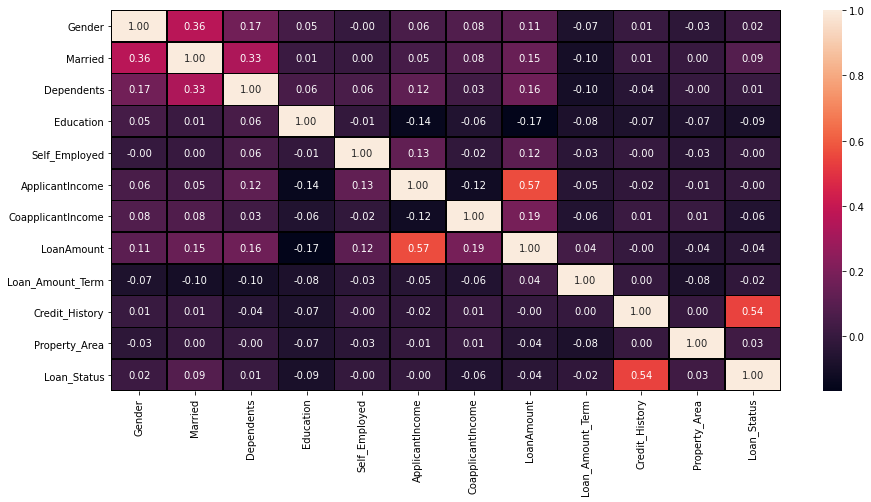

In [33]:
# we will plot all aboev values on hitmap just for good visualisation

import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,linecolor="black",fmt='.2f')

We can see that credit history plays here good role which is logical thing followed by Income

In [34]:
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

As we can see highly correaltted feature is Credit histrory and lowest is self_Employed.

# Outliers Checking in Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

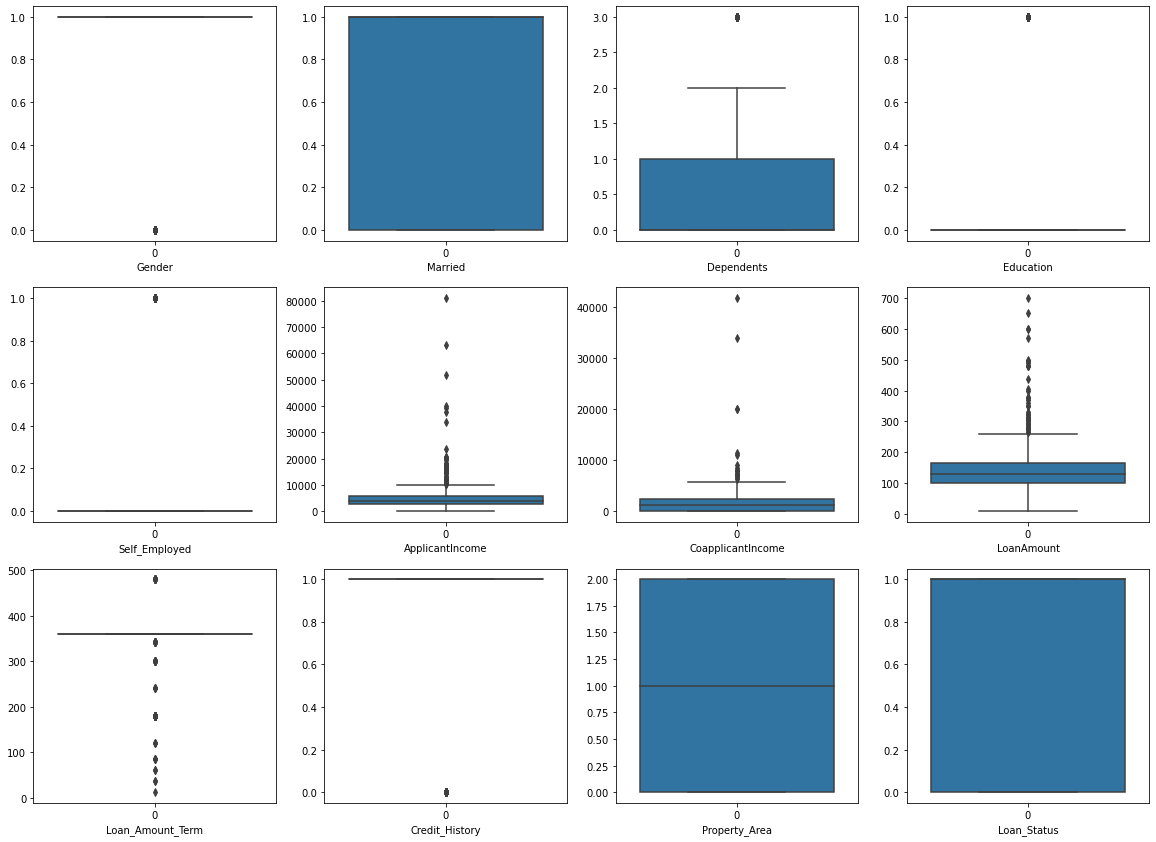

In [35]:
plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

We have outliers present in data as we can see graph of Incomes,Dependants. and amount of loan

In [36]:
# Lets Treat outliers

from scipy.stats import zscore
zscore=zscore(df)
zabs=np.abs(zscore)

z=df[(zabs<3).all(axis=1)]

In [37]:
z.shape

(577, 12)

In [38]:
df.shape

(614, 12)

In [39]:
loss=(614-577)/614*100
loss

6.026058631921824

We can afford 6% data loss

In [40]:
dropindex=df.index.difference(z.index)
dropindex

Int64Index([  9,  14,  68,  94, 126, 130, 133, 155, 171, 177, 183, 185, 242,
            262, 278, 308, 313, 333, 369, 402, 409, 417, 432, 443, 487, 495,
            497, 506, 523, 525, 546, 561, 575, 581, 585, 600, 604],
           dtype='int64')

In [41]:
df.drop(dropindex,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


<function matplotlib.pyplot.show(close=None, block=None)>

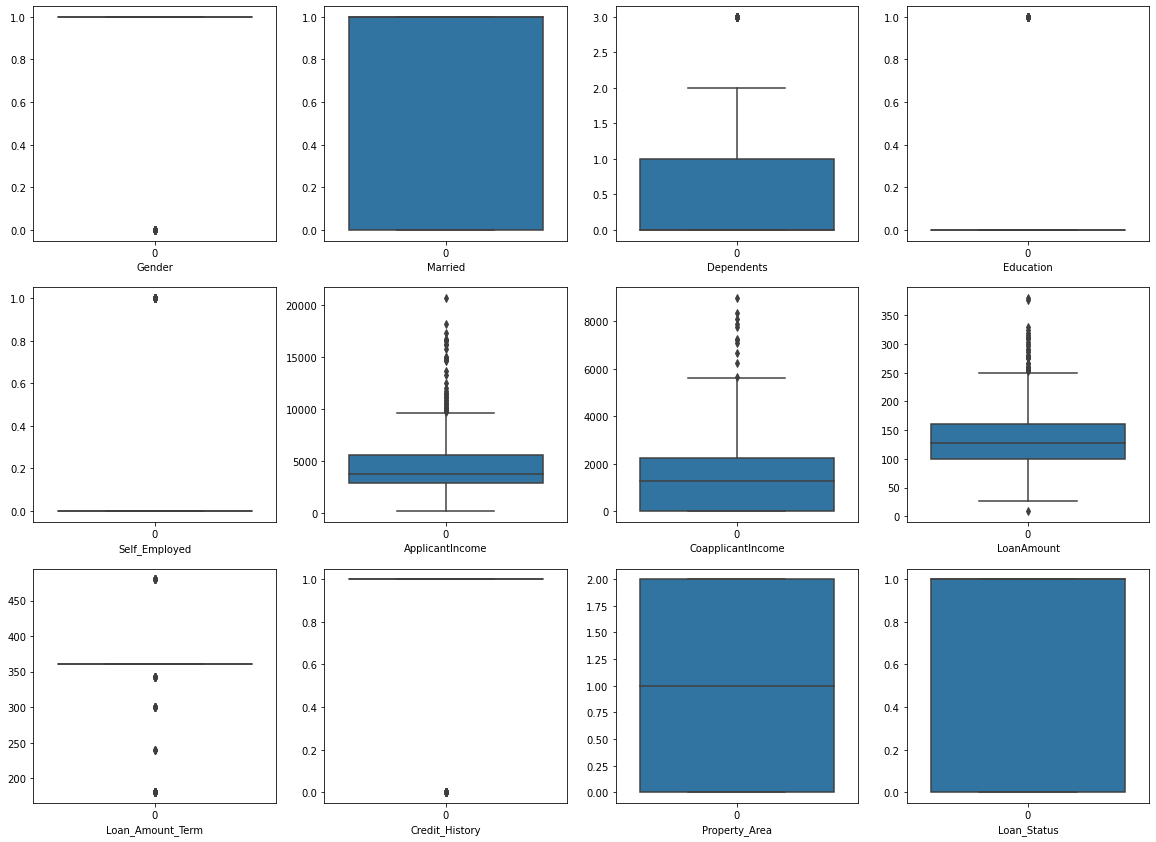

In [42]:

plt.figure(figsize=(20,25))

graph=1

for i in df:
    if graph<=13:
        plt.subplot(5,4,graph)
        sns.boxplot(data=df[i])
        plt.xlabel(i)
    graph+=1    
    
plt.show

Okay we handeled it up to some extent and now looks ok

# We should check skewness of data before processing

In [43]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

So skewness is present in data as we can see. Olny property area,Loan_status,married columns are exceptional

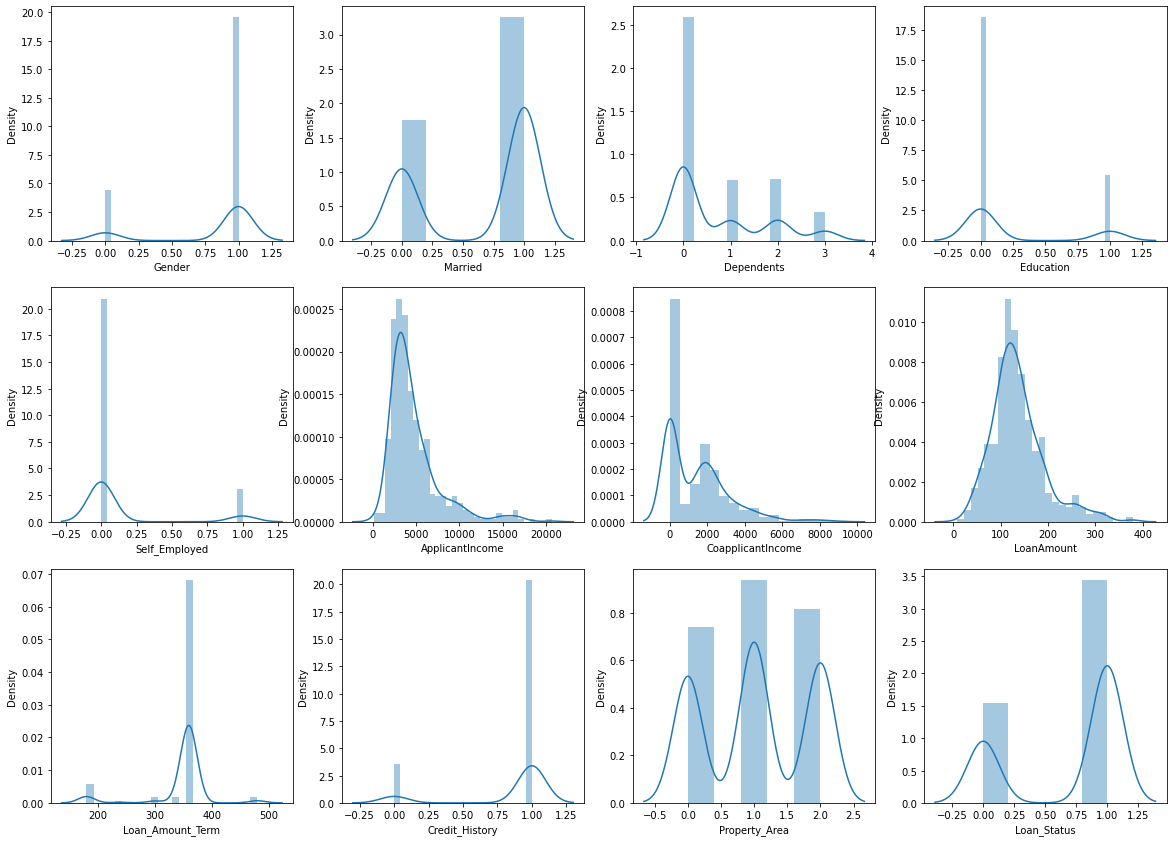

In [44]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    

We can observ same same thing in above graph. so we need to handle skewness

# Removing Skewness using yeo-johnson method

In [45]:
skewed_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

In [46]:
df[skewed_features] = scale.fit_transform(df[skewed_features].values)
df[skewed_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.681780,-1.122446,0.316078,0.142609
1,0.234783,0.744117,-0.015871,0.142609
2,-0.527201,-1.122446,-1.443112,0.142609
3,-0.791972,0.895786,-0.169860,0.142609
4,0.728848,-1.122446,0.221481,0.142609


In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.316078,0.142609,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,-0.015871,0.142609,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,0.142609,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,0.142609,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.221481,0.142609,1.0,2,1


<function matplotlib.pyplot.show(close=None, block=None)>

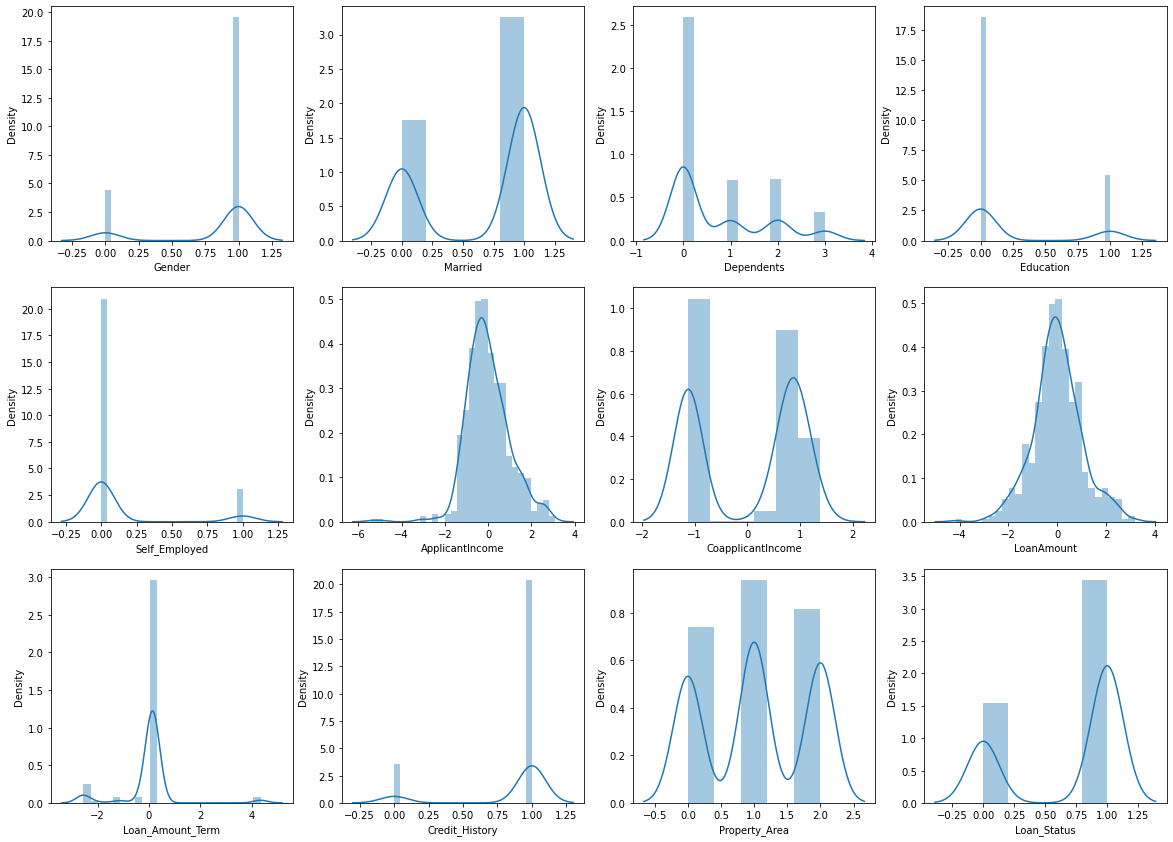

In [48]:
plt.figure(figsize=(20,25),facecolor="white")

plot=1

for i in df:
    if plot<=13:
        plt.subplot(5,4,plot)
        sns.distplot(df[i])
        plt.xlabel(i)
    plot+=1    
    
plt.show

We have removed skewness now 

# Outliers and skewness are removed now and we are ready to define X and Y

In [49]:
x = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
x.shape

(577, 11)

In [50]:
y.shape

(577,)

In [52]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0.681780,-1.122446,0.316078,0.142609,1.0,2
1,1,1,1,0,0,0.234783,0.744117,-0.015871,0.142609,1.0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.443112,0.142609,1.0,2
3,1,1,0,1,0,-0.791972,0.895786,-0.169860,0.142609,1.0,2
4,1,0,0,0,0,0.728848,-1.122446,0.221481,0.142609,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.301481,0.142609,1.0,0
610,1,1,3,0,0,0.035386,-1.122446,-2.321865,-2.559206,1.0,0
611,1,1,1,0,0,1.281658,0.173344,1.838099,0.142609,1.0,2
612,1,1,2,0,0,1.164426,-1.122446,0.961555,0.142609,1.0,2


In [57]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

As we can see our target variable is imbalnced and we need to balance it using oversampling becaseu if we do not balance data it create create bias and predication

In [59]:
# adding samples to make all the categorical label values same
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

So SMOT help us to and dummy data based on dataset trend and increase sample of lowest varible in traget columns

In [65]:
# Lets see if data in balanec or not

y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

We can see now count is same for both catagory

In [66]:
print(x.shape)
print(y.shape)

(796, 11)
(796,)


Just checking shape of x and y after applying SMOT

# Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.491741,-1.242228,-0.695185,-0.519170,-0.334263,0.664475,-1.066329,0.302947,0.120930,0.579602,1.275574
1,0.491741,0.805005,0.350878,-0.519170,-0.334263,0.207940,0.795866,-0.035876,0.120930,0.579602,-1.219160
2,0.491741,0.805005,-0.695185,-0.519170,2.991655,-0.570303,-1.066329,-1.492668,0.120930,0.579602,1.275574
3,0.491741,0.805005,-0.695185,1.926151,-0.334263,-0.840724,0.947181,-0.193053,0.120930,0.579602,1.275574
4,0.491741,-1.242228,-0.695185,-0.519170,-0.334263,0.712547,-1.066329,0.206391,0.120930,0.579602,1.275574
...,...,...,...,...,...,...,...,...,...,...,...
791,0.491741,0.805005,0.350878,-0.519170,-0.334263,0.302761,0.853864,0.479820,0.120930,0.579602,-1.219160
792,0.491741,0.805005,1.396940,-0.519170,-0.334263,0.211286,-1.066329,-0.265853,0.120930,0.579602,1.275574
793,0.491741,0.805005,0.350878,-0.519170,-0.334263,1.297642,-1.066329,0.396946,-1.110301,-1.864676,-1.219160
794,0.491741,-1.242228,-0.695185,-0.519170,-0.334263,0.596882,-1.066329,0.007027,0.120930,-1.864676,-1.219160


# Finding Random State

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print(f"Best Accuracy is: {maxAcc} on Random State: {maxRs}")

Best Accuracy is: 0.89375 on Random State: 88


We found best random state as 88 which will give us 89 % Accuracy

In [73]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [74]:
LOGR = LogisticRegression(solver = 'liblinear')
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
SV = SVC()
KNN = KNeighborsClassifier()
EXT=ExtraTreesClassifier()

model=[LOGR,RFC,DTC,SV,KNN,EXT]


for i in model:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=88)
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('performance matrix of',i,'is:')
    print("Confusion matrix :",confusion_matrix(y_test,predi))
    print("Classification report :", classification_report(y_test,predi,))
    print("Accuracy score :", accuracy_score(y_test,predi))
    print("*****************************************************************")

performance matrix of LogisticRegression(solver='liblinear') is:
Confusion matrix : [[57 33]
 [ 2 68]]
Classification report :               precision    recall  f1-score   support

           0       0.97      0.63      0.77        90
           1       0.67      0.97      0.80        70

    accuracy                           0.78       160
   macro avg       0.82      0.80      0.78       160
weighted avg       0.84      0.78      0.78       160

Accuracy score : 0.78125
*****************************************************************
performance matrix of RandomForestClassifier() is:
Confusion matrix : [[72 18]
 [ 1 69]]
Classification report :               precision    recall  f1-score   support

           0       0.99      0.80      0.88        90
           1       0.79      0.99      0.88        70

    accuracy                           0.88       160
   macro avg       0.89      0.89      0.88       160
weighted avg       0.90      0.88      0.88       160

Accuracy score 

In [75]:
from sklearn.model_selection import cross_val_score
j=[LOGR,RFC,DTC,SV,KNN,EXT]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=5)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LogisticRegression(solver='liblinear') is
[0.71875    0.71698113 0.74842767 0.77987421 0.78616352]
0.7500393081761006
0.029221709745971935


Cross_Validation_score of RandomForestClassifier() is
[0.74375    0.79874214 0.88050314 0.8490566  0.89937107]
0.8342845911949686
0.05665755874075345


Cross_Validation_score of DecisionTreeClassifier() is
[0.675      0.6918239  0.77358491 0.7672956  0.79874214]
0.7412893081761007
0.048705768536901506


Cross_Validation_score of SVC() is
[0.7        0.75471698 0.77358491 0.75471698 0.80503145]
0.7576100628930817
0.03417496867360118


Cross_Validation_score of KNeighborsClassifier() is
[0.725      0.6918239  0.76100629 0.72327044 0.78616352]
0.7374528301886792
0.03275884438148329


Cross_Validation_score of ExtraTreesClassifier() is
[0.7625     0.79245283 0.83018868 0.83647799 0.83647799]
0.811619496855346
0.029532320340629453




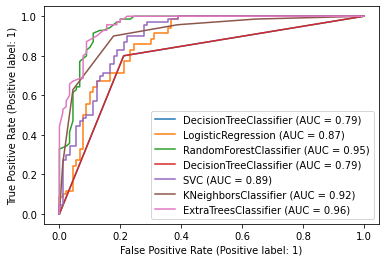

In [76]:
disp = plot_roc_curve(DTC,x_test,y_test)
mod = [LOGR,RFC,DTC,SV,KNN,EXT]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

We can also go with Extra Trees Classifier but I will choose SVC becaseu it has good cross validation score as compare to others

In [77]:
from sklearn.model_selection import GridSearchCV

parameters= {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

GCV=GridSearchCV(SV,parameters,cv=5)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

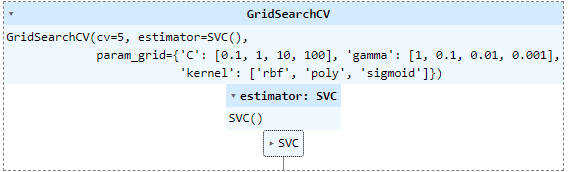

In [79]:
print(GCV.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Above we got best parameter which we can use

In [85]:
Loan_model = SVC(C=1,gamma=0.1,kernel='rbf')
Loan_model.fit(x_train, y_train)
pred = Loan_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.0


We were able to increase 2% By hypertunning parameters. Finlly we are getting 80% accuracy

# Saving best model with 80 % Accuracy

In [86]:
# Saving the model using .pkl
import joblib
joblib.dump(Loan_model ,"Loan_status.pkl")

['Loan_status.pkl']

# Lets use model to predict again

In [87]:
# Loading the saved model
model=joblib.load("Loan_status.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1])

In [89]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
155,1,1
156,1,1
157,0,1
158,0,1


We can see Comparison between Original and Predicted values

# Thank You